# Logistic Map Function Exploration
Explore the logistic map:
$$ x_{i} = rx_{i-1}(1 - x_{x-1}) $$

In [2]:
%matplotlib ipympl

import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np

## Plotting $x_i$ over $N$ iterations

interactive(children=(FloatSlider(value=1.0, description='r', max=4.0, step=0.01), FloatSlider(value=0.5, desc…

IntProgress(value=0, description='Calculation:', max=1000)

Plotting...
Drawing...


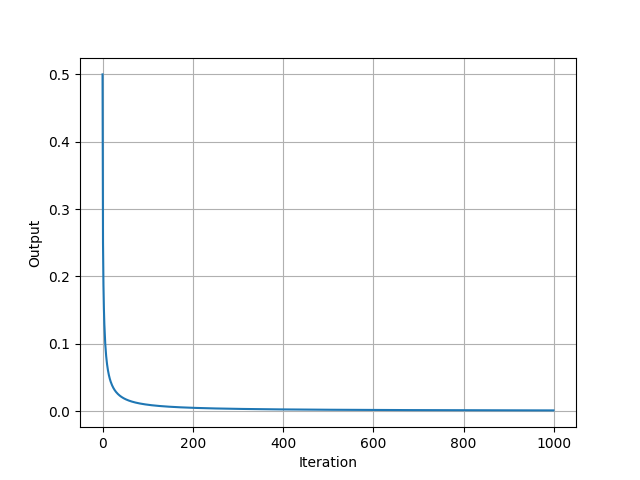

In [3]:
@interact_manual(
    r=FloatSlider(value=1, min=0, max=4, step=0.01), 
    x0=FloatSlider(value=0.5, min=0, max=1, step=0.01), 
    N=IntSlider(value=1000, min=1, max=10000, step=10))
def logistic_map_plot_iterations(r, x0, N):
    plt.close()

    x = np.empty(N)
    x[0] = x0

    progress_bar_update_interval = 5

    progress_bar_calc = IntProgress(value=0, min=0, max=len(x), description="Calculation:")
    display(progress_bar_calc)
    
    for i in range(1, N):
        x[i] = r * x[i-1] * (1 - x[i-1])

        if i % progress_bar_update_interval == 0:
            progress_bar_calc.value = i

    print("Plotting...")
    n = np.arange(N)

    fig, ax = plt.subplots()
    ax.plot(n, x)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Output")
    ax.grid()
    print("Drawing...")
    plt.show()

# Preview for github
logistic_map_plot_iterations(1, 0.5, 1000)

## Plotting $y = x_i$ (output) for each $x_{i-1}$ (input)

In [3]:
@interact_manual(
    r=FloatSlider(value=1, min=0, max=4, step=0.01), 
    N_x=IntSlider(value=1000, min=1, max=2000, step=10))
def logistic_map_plot_input_output(r, N_x):
    plt.close()
    
    x = np.linspace(0, 1, N_x)
    y = r * x * (1 - x)

    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")
    ax.grid()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='r', max=4.0, step=0.01), IntSlider(value=1000, descr…

## Plotting the bifurcation diagram of the logistic map

In [5]:
@interact_manual(x0=FloatSlider(value=0.5, min=0, max=1, step=0.01, layout=Layout(width='50%')), 
          r_range=FloatRangeSlider(value=[0, 4], min=0, max=4, step=0.0000000001, readout_format='.10', layout=Layout(width='50%')), 
          r_count=IntSlider(value=500, min=0, max=10000, step=10, layout=Layout(width='50%')), 
          N_transient=IntSlider(value=1000, min=1, max=2000, step=10, layout=Layout(width='50%')), 
          N_steady_state=IntSlider(value=1000, min=1, max=2000, step=10, layout=Layout(width='50%')), 
          marker_width=FloatSlider(value=0.001, min=0.00001, max=0.1, step=0.000001, readout_format='.4', layout=Layout(width='50%')))
def logistic_map_plot_steady_state(x0, r_range, r_count, N_transient, N_steady_state, marker_width):
    plt.close()
    r_start = r_range[0]
    r_end = r_range[1]
    r_list = np.linspace(r_start, r_end, r_count)


    progress_bar_update_interval = 5

    progress_bar_calc = IntProgress(value=0, min=0, max=len(r_list), description="Calculation:")
    display(progress_bar_calc)

    fig, ax = plt.subplots()

    r_vals = []
    x_vals = []
    for index, r in enumerate(r_list):
        
        if index % progress_bar_update_interval == 0:
            progress_bar_calc.value = index
            
        prev_x = x0
        next_x = 0
        for i in range(N_transient):
            next_x = r * prev_x * (1 - prev_x)
            prev_x = next_x

        x_r = np.empty(N_steady_state)
        x_r[0] = prev_x
        for i in range(1, N_steady_state):
            x_r[i] = r * x_r[i - 1] * (1 - x_r[i - 1])

        x_r = np.unique(x_r)
        
        r_vals.extend([r] * len(x_r))
        x_vals.extend(x_r)

    print("Plotting...")
    ax.scatter(r_vals, x_vals, s=marker_width, c='black', alpha=1)

    ax.grid()
    ax.set_xlabel("r value")
    ax.set_ylabel("x steady state")

    print("Drawing to screen...")
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='x0', layout=Layout(width='50%'), max=1.0, step=0.01)…